# Analyse TF-IDF du df_final

1. **Réaliser un TF-IDF** sur l'ensemble des `cases_texte` du `df_final`.
2. **Tenter de prédire** la colonne `major_mesh_terms` à partir du TF-IDF.

In [29]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)


In [10]:
df = pd.read_parquet('data/df_final')
df_metadata = pd.read_parquet('data/df_metadata')

In [11]:
import os
import s3fs

# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_final"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'w') as file_out:
    df.to_csv(file_out)

In [12]:
BUCKET_OUT = "s3://quentin1999/Data_Projet_NLP"
FILE_KEY_OUT_S3 = "df_metadata"
FILE_PATH_OUT_S3 = BUCKET_OUT + "/" + FILE_KEY_OUT_S3

with fs.open(FILE_PATH_OUT_S3, 'w') as file_out:
    df_metadata.to_csv(file_out)

## Afficher nuage de mot avec WordCloud

In [13]:
text_brut = str(df['case_text'])

In [14]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')


#stop_words = set(stopwords.words('english'))
#text_brut = [word for word in text_brut if word not in stop_words]

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

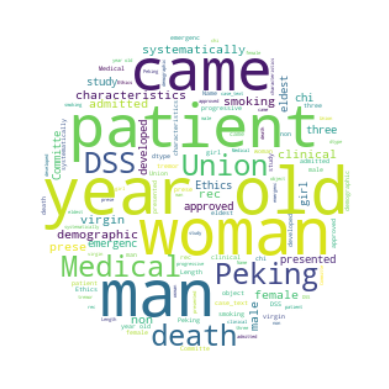

In [24]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes


STOPWORDS = set(stopwords.words('english'))

import matplotlib.pyplot as plt
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# plot a word cloud
text = str(df['case_text'])
wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords = STOPWORDS)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
import spacy


4
['0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

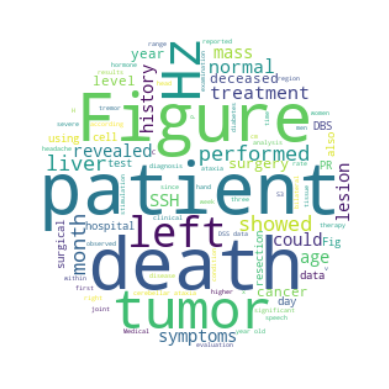

In [47]:
# CODE A REVOIR !!!!

import spacy

# Load the Med7 model
nlp = spacy.load("en_core_web_sm")

text = str(df['case_text'])

processed_doc = nlp(text)  # Process the text with spaCy
# Process the text
doc = [str(processed_doc), "SSH", "month", "DSS"]
print(len(doc))

# Extract medical terms
medical_terms = [ent for ent in doc]
medical_bagofwords = " ".join(medical_terms)
print(medical_terms)

# plot a word cloud
wc = WordCloud(background_color="white", repeat=True, mask=mask, stopwords = STOPWORDS)
wc.generate(medical_bagofwords)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [38]:
doc.ents

(0,
 30-year-old,
 Peking Union,
 1,
 DSS,
 2,
 3,
 42-year-old,
 prese,
 4,
 37-year-old,
 10713,
 70-year-old,
 10714,
 39-year-old,
 10715,
 Committe,
 10716,
 6-year-old,
 three,
 10717,
 66-year-old,
 10718)

## Bag-of-word representation

In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset, create X (features) and y (target), print the size
data_train, data_dev_test = train_test_split(df ,test_size=0.20, random_state=42)
data_dev, data_test = train_test_split(data_dev_test ,test_size=0.5, random_state=42)

print ('train size',data_train.shape)
print ('dev size', data_dev.shape)
print ('test size', data_test.shape)
# create features X and target y
X_train = data_train.case_text
X_dev = data_dev.case_text
X_test = data_test.case_text
y_train = data_train.major_mesh_terms
y_dev = data_dev.major_mesh_terms
y_test = data_test.major_mesh_terms

train size (8574, 9)
dev size (1072, 9)
test size (1072, 9)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

document = df.case_text

vectorizer = CountVectorizer(max_features=1000)

# fit on train data
vectorizer.fit(X_train)

# Apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [21]:
vectorizer

CountVectorizer(max_features=1000)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initiate the model
model = MultinomialNB()

# Train
model.fit(X_train_counts, y_train)

# Evuluate 
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test_counts)
accuracy_score(y_pred, y_test)
f1 = f1_score

print("Accuracy: ", accuracy)
print("F1 score : ", f1)